In [169]:
import sklearn
import pandas as pd
import matplotlib as plt

### Load Data
I selected "Stroke Prediction Dataset" from [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) with 11 clinical features for predicting stroke events

In [170]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Replace categorical variable into dummy/indicator variables

In [171]:
df = pd.get_dummies(df)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [172]:
features = [c for c in df.columns if c not in ['id', 'stroke']]
features       

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

### Apply min-max scale

In [173]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# df[features] = scaler.fit_transform(df[features])

In [174]:
X, y = df[features], df['stroke']

#### Train-test split

In [175]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

#### Configure and train XGBoost classifier for stroke prediction

In [176]:
import xgboost as xgb

clf = xgb.XGBClassifier(learning_rate=0.1,
                        objective='binary:logistic',
                        random_state=7)

In [177]:
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [178]:
import shap

explainer = shap.Explainer(clf)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


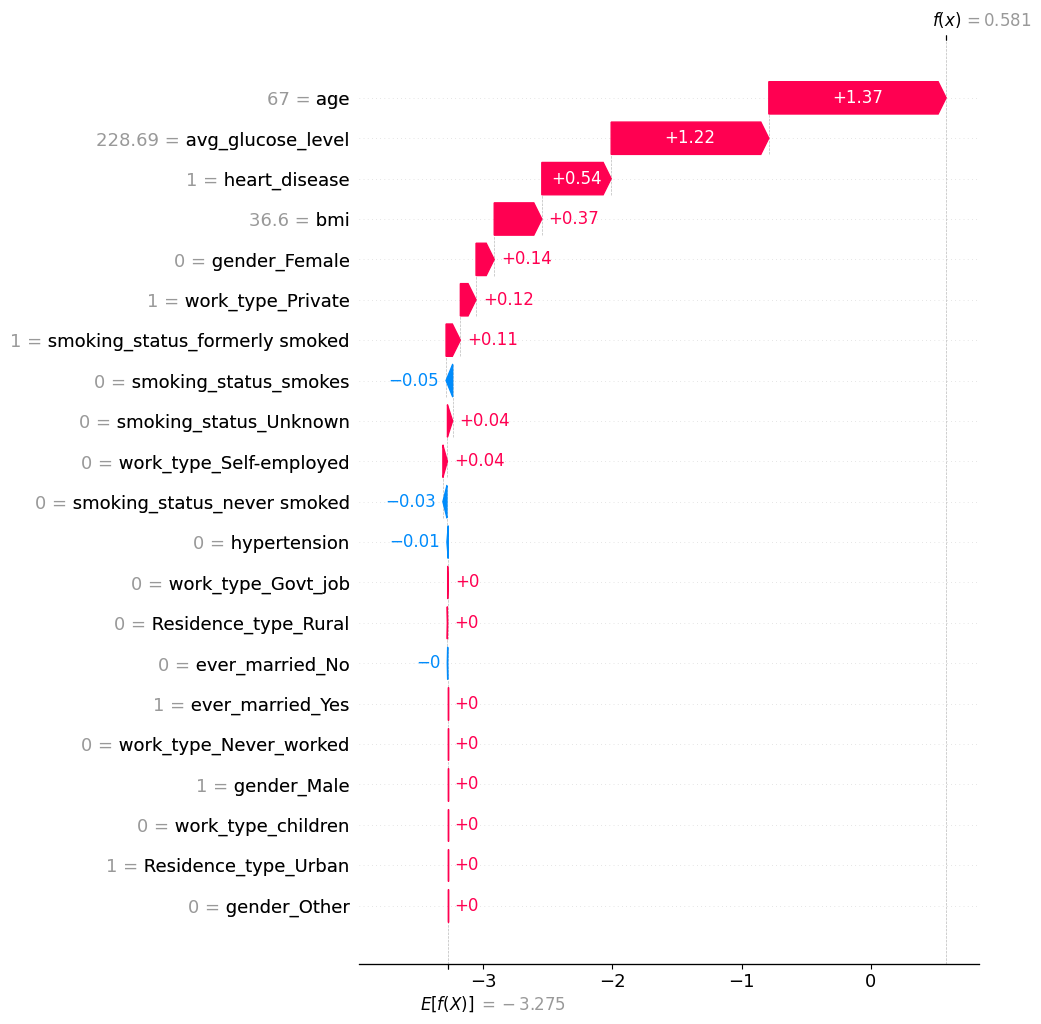

In [179]:
shap.plots.waterfall(shap_values[0], max_display=25)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


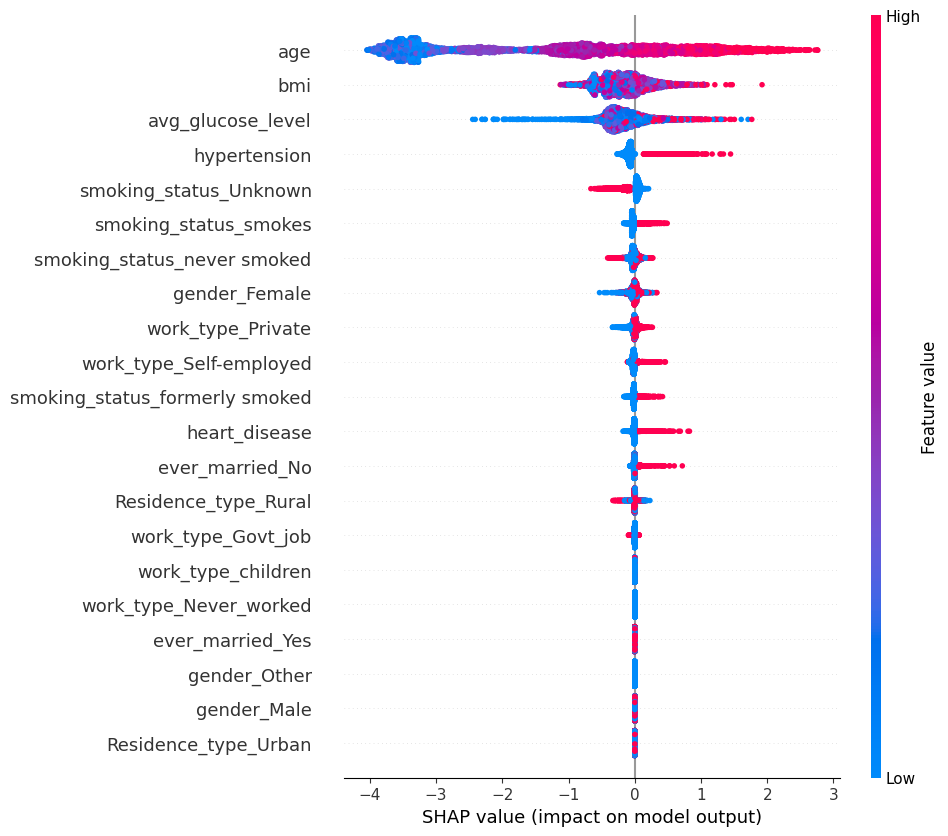

In [180]:
shap.plots.beeswarm(shap_values, max_display=25)

### Feature weights

`Age` feature has high weight as expected (it is more common among old people to have a stroke). Feature `ever_married` with `NO` value has high weight too, but it is correlated with age as well as older people usually had a chance to marry in their long lives =). Also obviously `heart_disease` can influence on stroke probability as well as `smoking_status` with `YES` value.

In [195]:
from eli5 import show_weights

show_weights(clf)

Weight,Feature
0.1752,age
0.0850,ever_married_No
0.0781,heart_disease
0.0696,hypertension
0.0651,work_type_Private
0.0615,smoking_status_formerly smoked
0.0609,avg_glucose_level
0.0603,gender_Female
0.0595,smoking_status_never smoked
0.0578,bmi


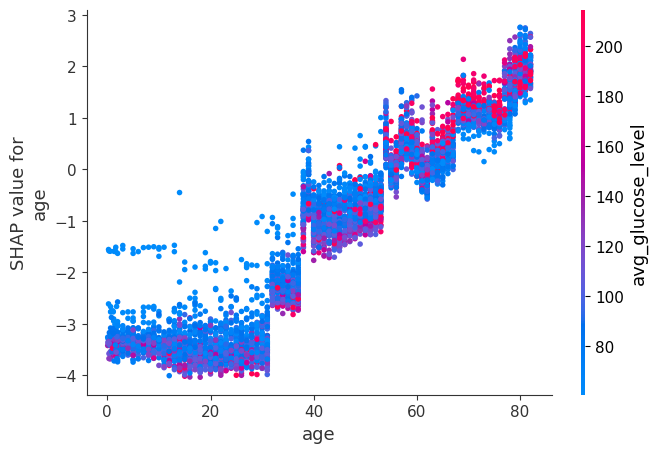

In [182]:
shap_values = explainer.shap_values(X)
shap.dependence_plot("age", shap_values, X)

### Permutation importance
The most importance features are `hypertension`, `age`, `avg_glucose_level`, `bmi`, while `smoking_status`, `Residence_type`, `work_type` and unexpacedly `heart_disease` are not.

In [183]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, scoring="balanced_accuracy")
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.0104 ± 0.0109,avg_glucose_level
0.0099 ± 0.0109,hypertension
0.0076 ± 0.0138,bmi
0.0067 ± 0.0140,age
0.0004 ± 0.0004,work_type_Private
0.0004 ± 0.0008,ever_married_No
0.0003 ± 0.0008,smoking_status_smokes
0 ± 0.0000,Residence_type_Urban
0 ± 0.0000,work_type_children
0 ± 0.0000,work_type_Never_worked


In [184]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X.values, 
                                                   feature_names=features,
                                                   class_names=['stroke'], 
                                                   verbose=True, 
                                                   mode='classification')

In [186]:
def check_person(person):
    print(f'Person {person} has ' + ('no ' if y.values[person] == 0 else '') + 'stroke')
    exp = explainer.explain_instance(X.values[person], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

### Person with stroke
All important parameters like `age` and `hypertension` are hight

In [194]:
check_person(9)

Person 9 has stroke
Intercept 0.03587799713003756
Prediction_local [0.0937331]
Right: 0.2352265


### Person without stroke
This is a 9 year old kid with high `avg_glucose_level`, but all other are ok => no stroke

In [192]:
check_person(500)

Person 500 has no stroke
Intercept 0.1242860369662656
Prediction_local [0.00117634]
Right: 0.00034264688


### Conclusion

Feature analysis of ***Stroke Prediction Dataset*** has shown expectable results as older people have stoke more frequently with younger as well as people with heart diseases. However, it was useful to prove our expectations and see model result predictions in concrete examples